In [8]:
import pandas  as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
import tensorflow as tf

In [14]:
df = pd.read_csv('Imputed_m96_Progressor.csv')

In [15]:
df

,PTID,VISCODE,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,...,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Calculated Diagnosis
0,002_S_0295,bl,0.000000,3.000000,4.000000,1.000000,28.000000,56.000000,5.000000,3.000000,...,0.946487,1.023623,1.135182,1.083713,1.131010,1.016576,0.976817,0.977503,1.054367,CNs
1,002_S_0295,m06,0.000000,5.330000,6.330000,1.000000,28.000000,50.000000,7.000000,2.000000,...,1.011747,1.026511,1.185862,1.006525,1.044206,1.025742,1.021633,1.037495,1.054806,CNs
2,002_S_0295,m12,0.000000,4.670000,5.670000,1.000000,30.000000,53.000000,10.000000,2.000000,...,0.985921,1.025781,1.163892,1.036070,1.064586,1.042524,0.997455,1.026956,1.055454,CNs
3,002_S_0295,m18,0.000000,4.170000,5.670000,1.500000,29.500000,49.000000,8.500000,2.000000,...,0.975817,1.025275,1.163750,1.042146,1.069793,1.051914,0.991613,1.008476,1.055178,CNs
4,002_S_0295,m24,0.000000,3.670000,5.670000,2.000000,29.000000,45.000000,7.000000,2.000000,...,0.963675,1.024709,1.174956,1.048991,1.066163,1.056240,0.980130,0.997897,1.054919,CNs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,941_S_6803,m72,0.997617,10.509164,16.352609,5.761848,26.198423,34.653974,4.779806,6.344202,...,3.183554,2.390091,2.795805,1.808741,1.777533,1.518968,1.237558,1.535085,1.915996,MCIs
30579,941_S_6803,m78,0.867200,6.716921,9.177599,2.947717,29.620267,37.521772,3.109639,2.706481,...,3.189672,2.571133,2.377254,1.529986,1.710471,1.620265,2.119877,2.228112,2.119254,MCIs
30580,941_S_6803,m84,2.760001,10.249716,16.054889,7.850159,29.350465,33.865883,0.538609,3.660119,...,1.849112,1.946852,2.254674,1.849332,1.852305,1.636661,1.427320,2.170922,1.882390,MCIs
30581,941_S_6803,m90,0.754309,10.511876,9.475303,3.253254,29.461123,41.040897,2.411145,2.910998,...,2.088639,2.868091,2.643641,1.868005,-0.011413,0.909256,1.439720,2.999306,1.529986,MCIs


In [16]:
def viscode_to_months(viscode):
    if viscode == 'bl':
        return 0
    elif viscode.startswith('m'):
        return int(viscode[1:])  # Convert 'mXX' to number of months
    
df['Months'] = df['VISCODE'].apply(viscode_to_months)

# Step 2: Sort the data by Patient ID and Months
df = df.sort_values(by=['PTID', 'Months'])
viscode_index = df.columns.get_loc('VISCODE')

# Insert 'Months' column at the position right after 'VISCODE'
df.insert(viscode_index + 1, 'Months', df.pop('Months'))
# Step 3: Select features and target variable
# Remove non-feature columns (PTID, VISCODE, etc.)
features = df.drop(columns=['PTID', 'VISCODE', 'Calculated Diagnosis'])

# Target is 'Calculated Diagnosis'
target = df['Calculated Diagnosis']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [11]:
df

,PTID,VISCODE,Months,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,...,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Calculated Diagnosis
0,002_S_0295,bl,0,0.000000,3.000000,4.000000,1.000000,28.000000,56.000000,5.000000,...,0.946487,1.023623,1.135182,1.083713,1.131010,1.016576,0.976817,0.977503,1.054367,CNs
1,002_S_0295,m06,6,0.000000,5.330000,6.330000,1.000000,28.000000,50.000000,7.000000,...,1.011747,1.026511,1.185862,1.006525,1.044206,1.025742,1.021633,1.037495,1.054806,CNs
2,002_S_0295,m12,12,0.000000,4.670000,5.670000,1.000000,30.000000,53.000000,10.000000,...,0.985921,1.025781,1.163892,1.036070,1.064586,1.042524,0.997455,1.026956,1.055454,CNs
3,002_S_0295,m18,18,0.000000,4.170000,5.670000,1.500000,29.500000,49.000000,8.500000,...,0.975817,1.025275,1.163750,1.042146,1.069793,1.051914,0.991613,1.008476,1.055178,CNs
4,002_S_0295,m24,24,0.000000,3.670000,5.670000,2.000000,29.000000,45.000000,7.000000,...,0.963675,1.024709,1.174956,1.048991,1.066163,1.056240,0.980130,0.997897,1.054919,CNs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,941_S_6803,m72,72,0.997617,10.509164,16.352609,5.761848,26.198423,34.653974,4.779806,...,3.183554,2.390091,2.795805,1.808741,1.777533,1.518968,1.237558,1.535085,1.915996,MCIs
30579,941_S_6803,m78,78,0.867200,6.716921,9.177599,2.947717,29.620267,37.521772,3.109639,...,3.189672,2.571133,2.377254,1.529986,1.710471,1.620265,2.119877,2.228112,2.119254,MCIs
30580,941_S_6803,m84,84,2.760001,10.249716,16.054889,7.850159,29.350465,33.865883,0.538609,...,1.849112,1.946852,2.254674,1.849332,1.852305,1.636661,1.427320,2.170922,1.882390,MCIs
30581,941_S_6803,m90,90,0.754309,10.511876,9.475303,3.253254,29.461123,41.040897,2.411145,...,2.088639,2.868091,2.643641,1.868005,-0.011413,0.909256,1.439720,2.999306,1.529986,MCIs


In [17]:
def create_sequences(features, target):
    X, y = [], []
    for patient_id in df['PTID'].unique():
        patient_data = features[df['PTID'] == patient_id]  # Features for the patient
        patient_target = target[df['PTID'] == patient_id].values[-1]  # Final target value for the patient
        X.append(patient_data)  # Append all 17 records as one sequence
        y.append(patient_target)  # Target is the last diagnosis for the patient
    return np.array(X), np.array(y)

sequence_length = 17  # Since each patient has 17 records
X, y = create_sequences(features, target)

In [18]:
df.isnull().sum()

PTID                     0
VISCODE                  0
Months                   0
CDRSB                    0
ADAS11                   0
ADAS13                   0
ADASQ4                   0
MMSE                     0
RAVLT_immediate          0
RAVLT_learning           0
RAVLT_forgetting         0
RAVLT_perc_forgetting    0
LDELTOTAL                0
DIGITSCOR                0
TRABSCOR                 0
FAQ                      0
mPACCdigit               0
mPACCtrailsB             0
MOCA                     0
EcogPtMem                0
EcogPtLang               0
EcogPtVisspat            0
EcogPtPlan               0
EcogPtOrgan              0
EcogPtDivatt             0
EcogPtTotal              0
EcogSPMem                0
EcogSPLang               0
EcogSPVisspat            0
EcogSPPlan               0
EcogSPOrgan              0
EcogSPDivatt             0
EcogSPTotal              0
Calculated Diagnosis     0
dtype: int64

In [21]:
print(type(y))


<class 'numpy.ndarray'>


In [23]:
import numpy as np

# Check unique values in `y`
unique_values = np.unique(y)
print(unique_values)


['CNp' 'CNs' 'MCIp' 'MCIs']


In [32]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM, Dense

In [26]:
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Apply one-hot encoding
y_one_hot = to_categorical(y_numeric)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [30]:
model = Sequential()


In [33]:
# Compile the model
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Specify the input shape
model.add(LSTM(units=50, return_sequences=True))  # First LSTM layer
model.add(LSTM(units=50))  # Second LSTM layer
model.add(Dense(units=y_one_hot.shape[1], activation='softmax'))  # Output layer for classification


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5828 - loss: 1.0460 - val_accuracy: 0.7861 - val_loss: 0.6205
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7800 - loss: 0.6101 - val_accuracy: 0.8111 - val_loss: 0.4811
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8106 - loss: 0.5132 - val_accuracy: 0.8583 - val_loss: 0.4247
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8354 - loss: 0.4541 - val_accuracy: 0.8583 - val_loss: 0.4018
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8492 - loss: 0.4266 - val_accuracy: 0.8556 - val_loss: 0.3703
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8684 - loss: 0.3791 - val_accuracy: 0.8750 - val_loss: 0.3468
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8358 - loss: 0.3929 - val_accuracy: 0.8639 - val_loss: 0.4068
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8673 - loss: 0.3437 - val_accuracy: 0.8722 - val_loss

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.2920 
Test Loss: 0.29998165369033813
Test Accuracy: 0.8888888955116272


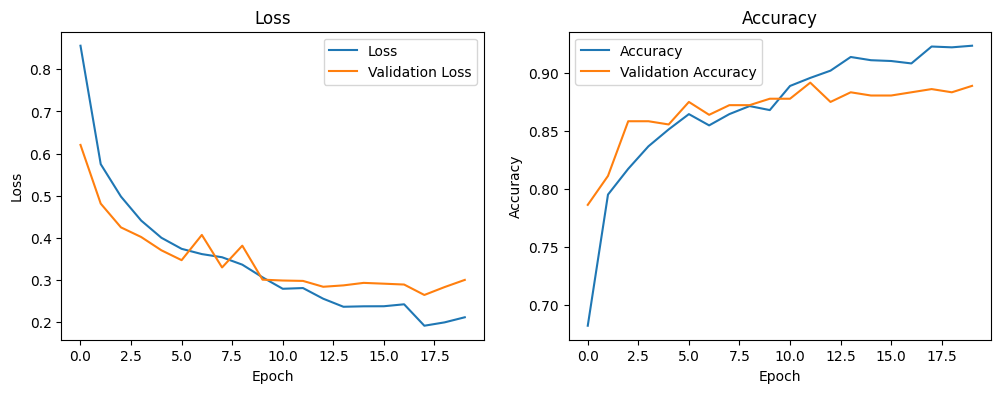

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()